___
# Ciência dos Dados - PROJETO 1

## João Gabriel Rodrigues Edivirges 2B


## Análise comportamental à cerca da Insegurança Alimentar em Famílias com renda abaixo de Um Salário Minimo em 2013 e 2009.


___
## Introdução:

Partindo do princípio do perfil brasileiro de 2009 e 2013, sabe-se que há muitas família que sobrevivem com renda igual ou abaixo de um salário mínimo. Desse contexto, surge a seguinte dúvida: Qual será o possível comportamento do brasileiro quando surge um fator financeiro limitando a segurança alimentar ?

As váriaveis que poderiam afetar este quadro são:

-Os moradores comeram apenas alguns alimentos que ainda tinha porque o dinheiro acabou;
-Os alimentos acabaram antes que os moradores tivessem dinheiro;
-Os moradores tiveram a preocupação de que os alimentos acabassem antes de poderem comprar ou receber mais comida;
-Rendimento mensal domiciliar per capita;
-Rendimento mensal domiciliar para todas as unidades domiciliares;

Porque o uso delas? O que elas afetam no panorama e porque duas rendas?

Basicamente as 3 variáveis descrevem uma gama muito ampla de acontecimentos possíveis, do mesmo modo que pegar apenas uma renda mensal domiciliar ou a per capta não mostraria os resultados com uma boa precisão. Logo tomou-se como base os salários minímos em 2009 e 2013 , que respectivamente foram R$ 465,00 e R$ 678,00. Também considerou-se o fator domiciliar, onde casas com muitos habitantes refletiriam o potencial real desta pesquisa. Vendo a média de ambos os anos, pode-se ver que a média gira em torno de 3.Portanto para intuitos de um quadro mais crítico, considerou-se casas com 5 ou mais membros. 


In [200]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import zeros_like
print(os.getcwd())

dados=pd.read_csv('DOM2013.csv')
dados.V4620.describe()

C:\Users\joony\Downloads


count    116543.000000
mean          3.104245
std           1.566849
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          24.000000
Name: V4620, dtype: float64

In [199]:
dados2=pd.read_csv('DOM2009.csv')
dados2.V4620.describe()

count    121163.000000
mean          3.286342
std           1.635258
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          22.000000
Name: V4620, dtype: float64

Aplicando os filtros de renda e pessoas por casa, buscou-se um gráfico que gerasse a frequência das respostas Sim e Não para cada um dos 3 possíveis comportamentos em 2013 em função da Renda Per Capta:
*a renda per capta máxima nesse período era de 112 para 5 ou mais no domicílio

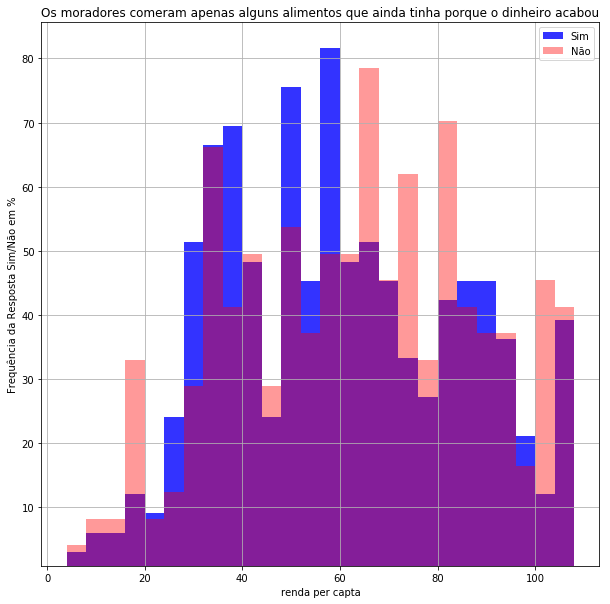

In [208]:

#Os moradores comeram apenas alguns alimentos que ainda tinha porque o dinheiro acabou FOME1
#Os alimentos acabaram antes que os moradores tivessem dinheiro=FOME2
#Os moradores tiveram a preocupação de que os alimentos acabassem antes de poderem comprar ou receber mais comida=FOME3
#Rendimento mensal domiciliar per capita=RENDA1
#Rendimento mensal domiciliar para todas as unidades domiciliares=RENDA2

dado=pd.DataFrame({
'FOME1':dados.V2109,
'FOME2':dados.V2105,
'FOME3':dados.V2103,
'RENDA1':dados.V4621,
'Número de componentes do domícilio':dados.V4620,
'RENDA2':dados.V4614
})
dado['FOME1']=dado['FOME1'].astype('category')
dado['FOME1'].cat.categories=["Sim","Não"]
dado['FOME2']=dado['FOME2'].astype('category')
dado['FOME2'].cat.categories=["Sim","Não"]
dado['FOME3']=dado['FOME3'].astype('category')
dado['FOME3'].cat.categories=["Sim","Não"]

dado.dropna(how='all')
rendaf1=dado[(dado['Número de componentes do domícilio']>5) & (dado['RENDA2']<678) & (dado['RENDA2']>0) ]


rendaFRS1= rendaf1.RENDA1[rendaf1.FOME1=='Sim']
rendaFRN1=rendaf1.RENDA1[rendaf1.FOME1=='Não']

rendaFRS2= rendaf1.RENDA1[rendaf1.FOME2=='Sim']
rendaFRN2=rendaf1.RENDA1[rendaf1.FOME2=='Não']

rendaFRS3= rendaf1.RENDA1[rendaf1.FOME3=='Sim']
rendaFRN3=rendaf1.RENDA1[rendaf1.FOME3=='Não']

# #print(rendaFR1)
# rendaf1.describe()
faixa=np.arange(4,112,4)

plot = rendaFRS1.plot.hist(bins=faixa,label="Sim", title='Os moradores comeram apenas alguns alimentos que ainda tinha porque o dinheiro acabou',weights=zeros_like(rendaFRS1)+1./rendaFRS1.size*1000, figsize=(10,10),alpha=0.8, color='blue')
plt.ylim(0.9)
plt.ylabel('Frequência da Resposta Sim')
plt.xlabel('renda per capta')

plot2 = rendaFRN1.plot.hist(bins=faixa,label = "Não", title='Os moradores comeram apenas alguns alimentos que ainda tinha porque o dinheiro acabou',weights=zeros_like(rendaFRN1)+1./rendaFRN1.size*1000, figsize=(10,10), alpha=0.4, color='red')
plt.ylim(0.9)
plt.ylabel('Frequência da Resposta Sim/Não em %')
plt.xlabel('renda per capta')
plt.legend()
plt.grid(True)


Agora para o comportamento 2 :

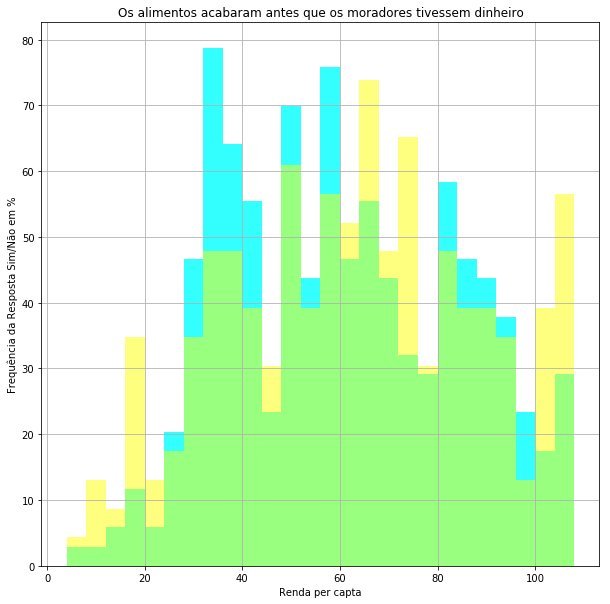

In [210]:
from numpy import zeros_like
grafico=rendaFRS2.plot.hist(bins=faixa,title='Os alimentos acabaram antes que os moradores tivessem dinheiro',label="Sim",weights=zeros_like(rendaFRS2)+1./rendaFRS2.size*1000,figsize=(10,10),alpha=0.8,color='cyan')
grafico2=rendaFRN2.plot.hist(bins=faixa,title='Os alimentos acabaram antes que os moradores tivessem dinheiro',label="Não",weights=zeros_like(rendaFRN2)+1./rendaFRN2.size*1000,figsize=(10,10),alpha=0.5,color='yellow')
plt.ylabel('Frequência da Resposta Sim/Não em %')
plt.xlabel('Renda per capta')
plt.grid(True)


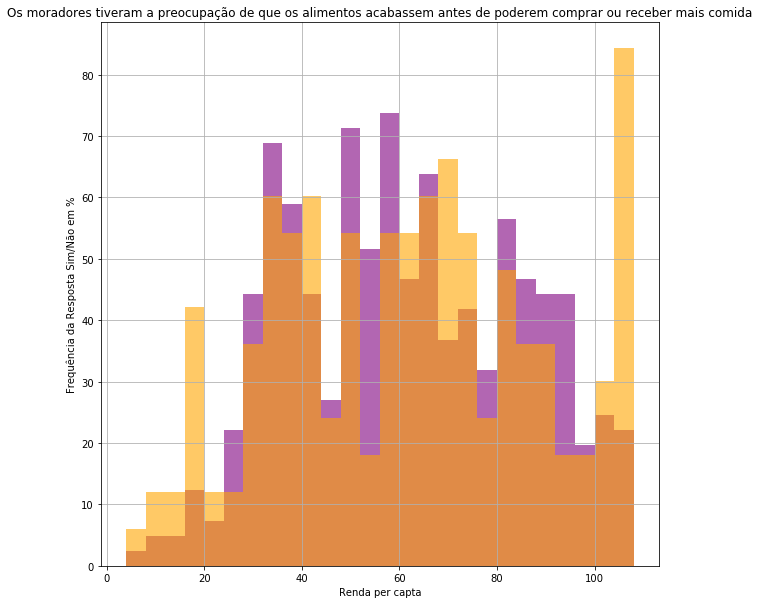

In [211]:
grafico=rendaFRS3.plot.hist(bins=faixa,label="Sim", title='Os moradores tiveram a preocupação de que os alimentos acabassem antes de poderem comprar ou receber mais comid',alpha=0.6,weights=zeros_like(rendaFRS3)+1./rendaFRS3.size*1000, figsize=(10,10),color='purple')
grafico2=rendaFRN3.plot.hist(bins=faixa,label="Não", title='Os moradores tiveram a preocupação de que os alimentos acabassem antes de poderem comprar ou receber mais comida',alpha=0.6,weights=zeros_like(rendaFRN3)+1./rendaFRN3.size*1000, figsize=(10,10),color='orange')
plt.ylabel('Frequência da Resposta Sim/Não em %')
plt.xlabel('Renda per capta')
plt.grid(True)


# # print(ut1)

Aplicando o mesmo para 2009, porém com o salário mínimo atualizado:
*a renda per capta máxima nesse período era de 77 para 5 ou mais no domicílio 

C:\Users\joony\Downloads


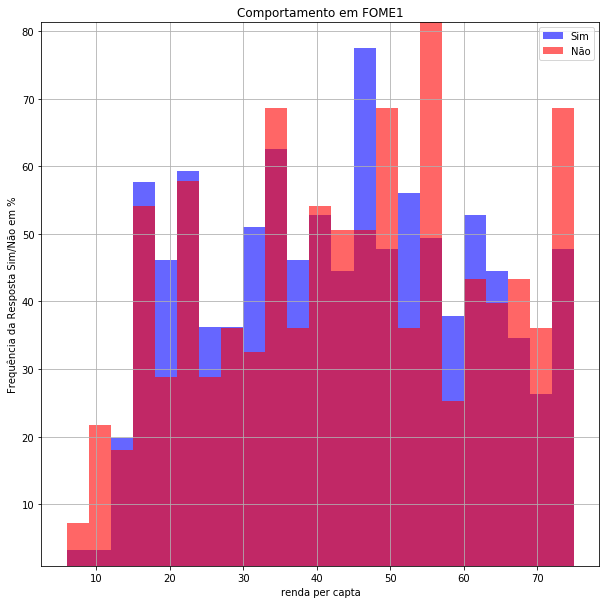

In [215]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import zeros_like
print(os.getcwd())

dados=pd.read_csv('DOM2009.csv')

dado=pd.DataFrame({
'FOME1':dados.V2109,
'FOME2':dados.V2105,
'FOME3':dados.V2103,
'RENDA1':dados.V4621,
'Número de componentes do domícilio':dados.V4620,
'RENDA2':dados.V4614
})
dado['FOME1']=dado['FOME1'].astype('category')
dado['FOME1'].cat.categories=["Sim","Não"]
dado['FOME2']=dado['FOME2'].astype('category')
dado['FOME2'].cat.categories=["Sim","Não"]
dado['FOME3']=dado['FOME3'].astype('category')
dado['FOME3'].cat.categories=["Sim","Não"]

dado.dropna(how='all')


rendaf1=dado[(dado['Número de componentes do domícilio']>5) & (dado['RENDA2']<465) & (dado['RENDA2']>0) ]

rendaFRS1= rendaf1.RENDA1[rendaf1.FOME1=='Sim']
rendaFRN1=rendaf1.RENDA1[rendaf1.FOME1=='Não']

rendaFRS2= rendaf1.RENDA1[rendaf1.FOME2=='Sim']
rendaFRN2=rendaf1.RENDA1[rendaf1.FOME2=='Não']

rendaFRS3= rendaf1.RENDA1[rendaf1.FOME3=='Sim']
rendaFRN3=rendaf1.RENDA1[rendaf1.FOME3=='Não']

faixa=np.arange(6,77,3)
# renda1S=pd.cut(rendaFRS1,faixa,right=False)
# renda1N=pd.cut(rendaFRN1,faixa,right=False)
# ut1 =(renda1.value_counts(normalize=True)*100).round(decimals=1).reindex(faixa)



plot = rendaFRS1.plot.hist(bins=faixa,label="Sim", title='Comportamento em FOME1',weights=zeros_like(rendaFRS1)+1./rendaFRS1.size*1000, figsize=(10,10),alpha=0.6, color='blue')
plt.ylim(0.9)
plt.ylabel('Frequência da Resposta Sim')
plt.xlabel('renda per capta')

plot2 = rendaFRN1.plot.hist(bins=faixa,label = "Não", title='Comportamento em FOME1',weights=zeros_like(rendaFRN1)+1./rendaFRN1.size*1000, figsize=(10,10), alpha=0.6, color='red')
plt.ylim(0.9)
plt.ylabel('Frequência da Resposta Sim/Não em %')
plt.xlabel('renda per capta')
plt.legend()
plt.grid(True)



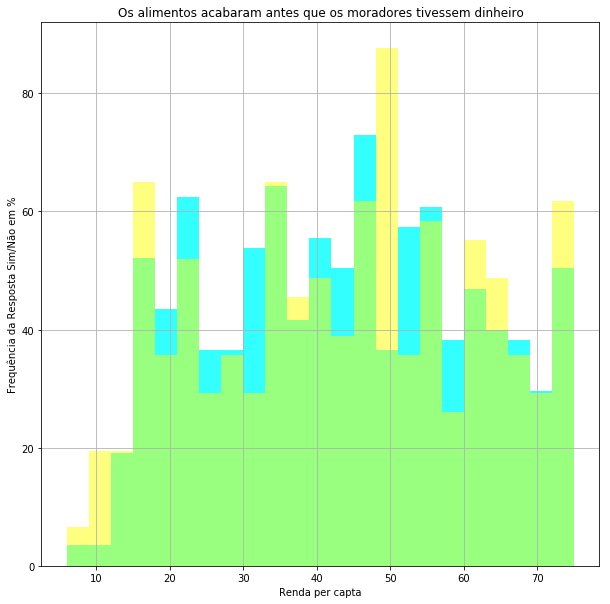

In [213]:
grafico=rendaFRS2.plot.hist(bins=faixa,title='Os alimentos acabaram antes que os moradores tivessem dinheiro',label="Sim",weights=zeros_like(rendaFRS2)+1./rendaFRS2.size*1000,figsize=(10,10),alpha=0.8,color='cyan')
grafico2=rendaFRN2.plot.hist(bins=faixa,title='Os alimentos acabaram antes que os moradores tivessem dinheiro',label="Não",weights=zeros_like(rendaFRN2)+1./rendaFRN2.size*1000,figsize=(10,10),alpha=0.5,color='yellow')
plt.ylabel('Frequência da Resposta Sim/Não em %')
plt.xlabel('Renda per capta')
plt.grid(True)

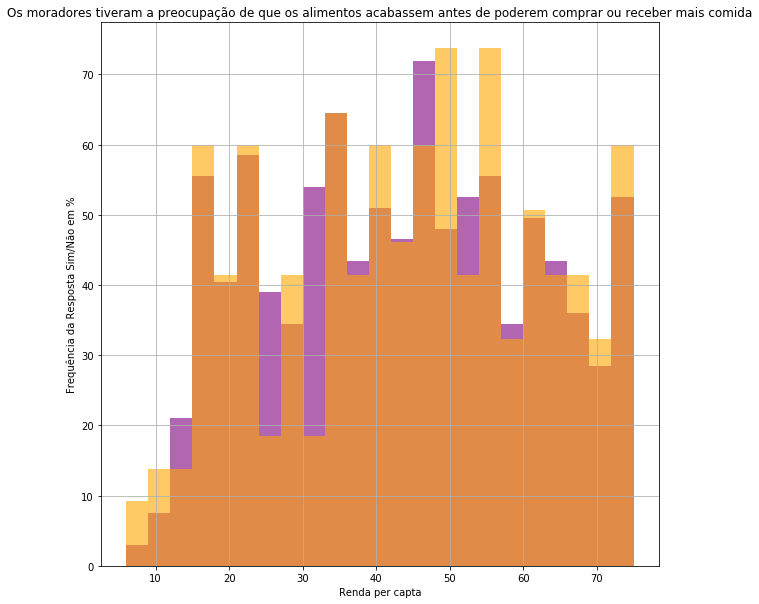

In [214]:
grafico=rendaFRS3.plot.hist(bins=faixa,label="Sim", title='Os moradores tiveram a preocupação de que os alimentos acabassem antes de poderem comprar ou receber mais comid',alpha=0.6,weights=zeros_like(rendaFRS3)+1./rendaFRS3.size*1000, figsize=(10,10),color='purple')
grafico2=rendaFRN3.plot.hist(bins=faixa,label="Não", title='Os moradores tiveram a preocupação de que os alimentos acabassem antes de poderem comprar ou receber mais comida',alpha=0.6,weights=zeros_like(rendaFRN3)+1./rendaFRN3.size*1000, figsize=(10,10),color='orange')
plt.ylabel('Frequência da Resposta Sim/Não em %')
plt.xlabel('Renda per capta')
plt.grid(True)



___
## Conclusão 

A partir dessa análise mais completa sobre os possíveis comportamentos de famílias com renda abaixo de um salário mínimo, pode-se concluir que o comportamento não é linear. É normal inferir que quando não há recursos disponíveis, tende-se a deixar de comer ou comer comida de qualidade inferior. Tanto quanto em 2009 quanto 2013, pode-se ver isso não é verdade, uma vez que tanto famílias de baixa renda per capta estão respondendo não aos 3 comportamentos, quanto famílias que possuem uma renda per capta acima das outras estão respondendo sim aos 3 comportamentos. Isso reflete que há muito mais variáveis a se considerar, como local (urbano ou rural), idade e muitas outras. A que mais chama atenção é o ambiente, pois fora das grandes cidades, a tendência do custo de manutenção é ser menor em relação à cidade.
